In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/278k-us-wildfires-due-to-lightning-2004-2015/US_Lightning_Forest_Fires.csv


In [2]:
df = pd.read_csv("/kaggle/input/278k-us-wildfires-due-to-lightning-2004-2015/US_Lightning_Forest_Fires.csv")
df.head()

,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,0,1,2004,05-12-2004,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,1,3,2004,06-28-2004,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2,4,2004,06-28-2004,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,3,5,2004,06-30-2004,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,4,6,2004,07-01-2004,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278468 entries, 0 to 278467
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               278468 non-null  int64  
 1   index                    278468 non-null  int64  
 2   FIRE_YEAR                278468 non-null  int64  
 3   Fire_Date                278468 non-null  object 
 4   DISCOVERY_TIME           228272 non-null  float64
 5   STAT_CAUSE_DESCR         278468 non-null  object 
 6   Days_to_extinguish_fire  227876 non-null  float64
 7   CONT_TIME                220068 non-null  float64
 8   FIRE_SIZE                278468 non-null  float64
 9   FIRE_SIZE_CLASS          278468 non-null  object 
 10  LATITUDE                 278468 non-null  float64
 11  LONGITUDE                278468 non-null  float64
 12  STATE                    278468 non-null  object 
 13  FIPS_CODE                156911 non-null  float64
 14  FIPS

In [4]:
df.isnull().sum()

Unnamed: 0                      0
index                           0
FIRE_YEAR                       0
Fire_Date                       0
DISCOVERY_TIME              50196
STAT_CAUSE_DESCR                0
Days_to_extinguish_fire     50592
CONT_TIME                   58400
FIRE_SIZE                       0
FIRE_SIZE_CLASS                 0
LATITUDE                        0
LONGITUDE                       0
STATE                           0
FIPS_CODE                  121557
FIPS_NAME                  121557
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [7]:
df['Fire_Date'] = pd.to_datetime(df['Fire_Date'], errors='coerce')

In [8]:
df['Fire_Date'].head()

0   2004-05-12
1   2004-06-28
2   2004-06-28
3   2004-06-30
4   2004-07-01
Name: Fire_Date, dtype: datetime64[ns]

In [9]:
df['DISCOVERY_TIME'] = df['DISCOVERY_TIME'].fillna(df['DISCOVERY_TIME'].mode()[0])

In [10]:
df['Days_to_extinguish_fire'] = df['Days_to_extinguish_fire'].fillna(df['Days_to_extinguish_fire'].median())

In [11]:
df['CONT_TIME'] = df['CONT_TIME'].fillna(df['CONT_TIME'].mode()[0])

In [12]:
df.isnull().sum()

FIRE_YEAR                       0
Fire_Date                       0
DISCOVERY_TIME                  0
STAT_CAUSE_DESCR                0
Days_to_extinguish_fire         0
CONT_TIME                       0
FIRE_SIZE                       0
FIRE_SIZE_CLASS                 0
LATITUDE                        0
LONGITUDE                       0
STATE                           0
FIPS_CODE                  121557
FIPS_NAME                  121557
dtype: int64

In [13]:
df.drop(columns=['FIPS_CODE', 'FIPS_NAME'], inplace=True)


In [14]:
df.isnull().sum()

FIRE_YEAR                  0
Fire_Date                  0
DISCOVERY_TIME             0
STAT_CAUSE_DESCR           0
Days_to_extinguish_fire    0
CONT_TIME                  0
FIRE_SIZE                  0
FIRE_SIZE_CLASS            0
LATITUDE                   0
LONGITUDE                  0
STATE                      0
dtype: int64

In [15]:
df.head()

,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,2004,2004-05-12,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA
1,2004,2004-06-28,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA
2,2004,2004-06-28,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA
3,2004,2004-06-30,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA
4,2004,2004-07-01,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA


In [16]:
features = df[['FIRE_SIZE', 'Days_to_extinguish_fire', 'LATITUDE', 'LONGITUDE']]
features.head()

,FIRE_SIZE,Days_to_extinguish_fire,LATITUDE,LONGITUDE
0,0.25,0.0,38.933056,-120.404444
1,0.10,5.0,38.559167,-119.913333
2,0.10,5.0,38.559167,-119.933056
3,0.10,1.0,38.635278,-120.103611
4,0.10,1.0,38.688333,-120.153333


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

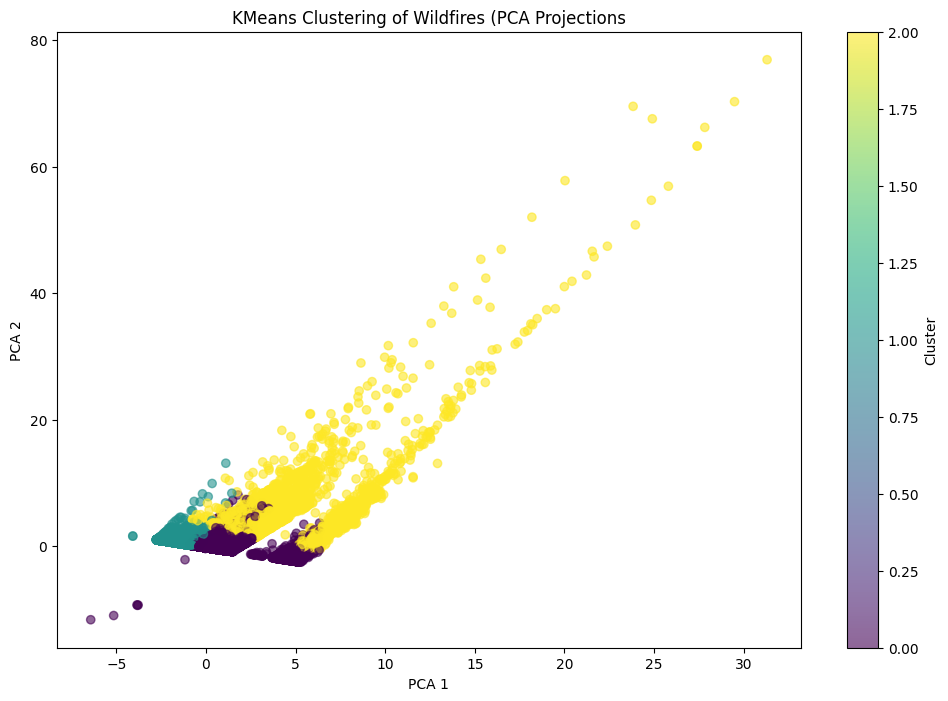

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(12,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("KMeans Clustering of Wildfires (PCA Projections")
plt.xlabel('PCA 1')
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

In [21]:
df['Cluster'] = clusters


In [22]:
df.groupby('Cluster')[['FIRE_SIZE', 'Days_to_extinguish_fire', 'LATITUDE', 'LONGITUDE']].mean()


,FIRE_SIZE,Days_to_extinguish_fire,LATITUDE,LONGITUDE
Cluster,,,,
0,109.607388,1.474269,41.104596,-114.173644
1,66.786684,0.320316,32.333045,-84.792586
2,12775.883978,70.417096,47.706946,-121.413376


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

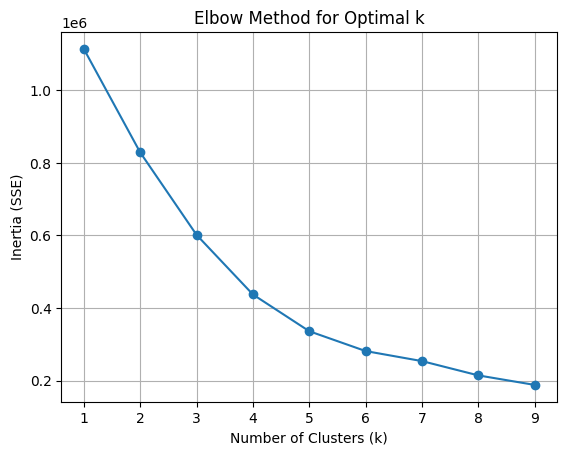

In [23]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

# Plot
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [24]:
df.to_csv("US-Wildfire.csv" )